## Simple linear regression via gradient descent
### Dr. Bruns

In [90]:
import numpy as np
import numpy.linalg as LA
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

### Define functions used for performing gradient descent

function gradient(f,x)

In [91]:
# return the gradient of function f at input vector x (x must be iterable)
def gradient(f, x, epsilon=0.01):
  part = []
  for i in range(x):
      xi = x.copy()
      xi[i] = x[i] + epsilon
      part.append((f(*xi) - f(*x))/ epsilon)
  return (np.array(part))

function find_min(f, n, alpha, max_iterations, min_change)

In [92]:
# return the vector x such that multi-variate function f(x) is minimized 
# n - length of input vector to f
# alpha - learning rate
# max_iterations and min_change are stopping conditions:
#   max_iterations - return if max_iterations performed
#   min_change - return if change to x is less than min_change
def find_min(f, n, alpha=0.01, max_iterations=10000, min_change=0.0001):
    theta = np.random.randn(2,1) # random initialization
    for iteration in range(max_iterations):
        gradients = gradient(f, n)
        theta = theta - alpha * gradients
    return(theta)

function mse_cost(b0, b1, X, y)

In [93]:
# compute MSE for simple linear regression problem
# X is an augmented feature matrix of two columns, y is an array of numeric labels
def mse_cost(b0, b1, X, y):
    MSE = 0
    m = y.shape[0]
    for i in range(m):
        y_prediction = b0 + b1 *(X[i][1])
        MSE += (y[i] - y_prediction) ** 2 
    return(MSE / m) 

### Load and preprocess the 1978 Boston housing data

In [94]:
dat = load_boston()
    
X = dat['data'][:,5:6]   # average number of rooms (this gives a matrix, not an array)
y = dat['target']        # house price (thousands of dollars)
dat['feature_names']

# remove data where the house price is exactly the max value
# of 50.0; this is a result of censoring.
not_max_rows = (y != 50.0)
y = y[not_max_rows]
X = X[not_max_rows]
n,m = X.shape

The augmented matrix of training data, with 1's in the first column.

In [95]:
X0 = np.ones((n,1))
X_aug = np.hstack((X0, X))

We will be trying to predict house price by the number of rooms in the house.

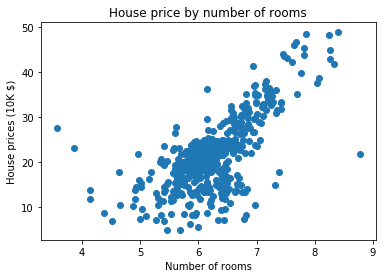

In [96]:
plt.scatter(X, y)
plt.xlabel('Number of rooms')
plt.ylabel('House prices (10K $)')
plt.title('House price by number of rooms');

### Compute the coeffient values with minimal MSE using the normal equation

In [97]:
beta_normal = LA.inv(X_aug.T.dot(X_aug)).dot(X_aug.T.dot(y))
beta_normal = beta_normal.reshape(-1, beta_normal.shape[0])  # -> 1x2 matrix

### Compute the coeffient values with minimal MSE using gradient descent

A simplified version of the mse_cost function that does not expose the training data as parameters.

In [98]:
def f_mse(b0,b1):
    return(mse_cost(b0, b1, X_aug, y))

# compute MSE for a couple of choices for b0, b1
print(np.round(f_mse(-30, 8),2), np.round(f_mse(-10, 6),2))

35.46 68.89


The following plot shows the mean squared error (MSE) for many values of the linear coefficients $\theta_0$, $\theta_1$, using the Boston housing data.  Red values are high numbers, blue values are low numbers.

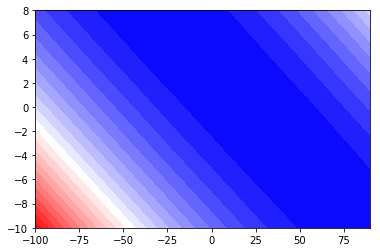

In [99]:
B0 = np.arange(-100, 100, 10)
B1 = np.arange(-10, 10, 2)
B0, B1 = np.meshgrid(B0, B1)

# see stackoverflow.com/questions/9170838/surface-plots-in-matplotlib
zs = np.array([f_mse(b0,b1) for b0,b1 in zip(np.ravel(B0), np.ravel(B1))])
Z = zs.reshape(B0.shape)
    
cmap = cm.get_cmap('bwr')   # red value is high, dark blue is low
plt.contourf(B0, B1, Z, 30, cmap=cmap);      # filled contour map

Gradient descent is performed here.  The gradient descent function is very sensitive to the alpha parameter, probably because the surface of MSE values is very flat around the minimum value.

In [100]:
beta_gd = find_min(f_mse, 2, alpha=0.01, max_iterations=10000, min_change=0.0001)
beta_gd = beta_gd.reshape(-1, beta_gd.shape[0])  # -> 1x2 matrix

stopped on max iterations


### Plot the model obtained by the normal equation (red) and gradient descent (black).

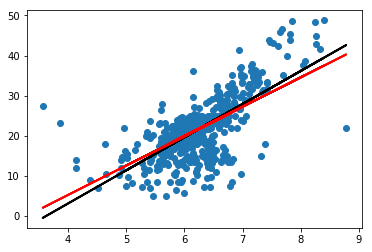

In [101]:
y_normal = beta_normal.dot(X_aug.T).T
y_gd     = beta_gd.dot(X_aug.T).T

plt.scatter(X, y)
plt.plot(X, y_normal,    color='black', linewidth=2)
plt.plot(X, y_gd, color='red', linewidth=2);